# Homework 3

# In Vino Veritas

Can a winemaker predict how a wine will be received based on the chemical properties of the wine? Are there chemical indicators that correlate more strongly with the perceived "quality" of a wine?

In this problem we'll examine the wine quality dataset hosted on the [UCI website](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). This data records 11 chemical properties (such as the concentrations of sugar, citric acid, alcohol, pH etc.) of thousands of red and white wines from northern Portugal, as well as the quality of the wines, recorded on a scale from 1 to 10. In this problem, we will only look at the data for *red* wine.

** Import several necessary packages **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem 1: Data collection

Import only the data for **red** wine from the [dataset repository](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). **Build a pandas dataframe** from the csv file and **print the head**. You might have to change the default delimiter used by the [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function in Pandas. To make it easy, I provide a right code here. 

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


As in any machine learning problem, we have the feature data, usually labeled as X, and the target data, labeled y. Every row in the matrix X is a datapoint (i.e. a wine) and every column in X is a feature of the data (e.g. pH). For a classification problem, y is a column vector containing the class of every datapoint.

We will use the quality column as our target variable.

Also, we will simplify the problem to a binary world in which wines are either "bad" (score<7) or "good" (score≥7). Create a new feature called 'y_label' from 'quality' feature accordingly such that it only contains zeros ("bad" wines) and ones ("good" wines). For example, if originally quality=[1,3,8,4,7], the new y_label should be [0,0,1,0,1].

In [3]:
df['y_label']=df['quality'].apply(lambda x: 0 if x<7 else 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,y_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### Problem 2: Unbalanced classification evaluation

In this section, we explore a number of different methods to predict the quality of a wine y based on the recorded features X. Formulated as a machine learning problem, we wish to predict the **target y** as a function of the **features X**.

Because we have defined y as a binary variable (encoding bad as 0 and good as 1), this is a **classification** problem. 

For this problem, we will focus on **random forests**. Recall from class that the random forest technique works by aggregating the results from a number of randomly perturbed decision trees constructed to explain the data.

(a) In class, we saw that for a fixed set of data, a decision tree algorithm will generate a single fixed tree to perform a classification task. Describe how a random forest is built from individual decision trees. What are the sources of randomness in the process that are used to build a diverse set of decision trees?

* Use **bootstrap** to sample from the original data sample, and use different bootstrap samples to build a set of decision trees, which become the random forest. 

(b) There are many ways to construct a random forest -- these differences in the method of construction are encoded as *tuning parameters*. As is often the case when our goal is to construct a good prediction, we can set these tuning parameters to obtain the best projected performance in a prediction task. One of the most important tuning parameters in building a random forest is the number of trees to construct.

Here, you should apply the random forest classifier to the wine data and use cross-validation to explore how the score of the classifier changes when varying the number of trees in the forest. Use the [random forest classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) built into the scikit-learn library and the [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score) function (using the default scoring method) to **plot the scores of the random forests as a function of the number of trees in the random forest**, ranging from 1 (simple decision tree) to 40. You should use 10-fold cross-validation. Feel free to use the boxplot functionality of the seaborn library.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [6]:
X=df.drop(['quality','y_label'],axis=1)
y=df['y_label']

In [7]:
cvs=[]
for i in range(1,41):
    rfc=RandomForestClassifier(n_estimators=i)
    cvs.append(cross_val_score(rfc,X,y,cv=10))

Text(0, 0.5, 'cross-validation score')

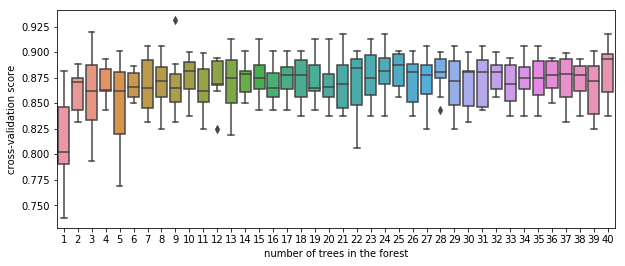

In [8]:
plt.figure(figsize=(10,4))
sns.boxplot(x=list(range(1,41)),y=cvs)
plt.xlabel('number of trees in the forest')
plt.ylabel('cross-validation score')

(c) Describe the relationship between cross validation accuracy and the number of trees. What tradeoffs should we consider when choosing the number of trees to use?

* When the tree number is 1, the average cross-validation score is about 0.8, and when the number of trees increases, the average cross-validation score is in the range of 0.85 and 0.9. We should consider the average value of the cross-validation score score when we choose the number of trees to use.

(d) These accuracy scores look very promising compared to, say, classifying the wine using a coinflip. However, in binary classification problems, accuracy can be misleading if one class (say, bad wine) is much more common than another (say, good wine), this is, when the classes are **unbalanced**.

**Print** the percentage of wines that are labeled as "bad" in the dataset and **plot the same boxplot** as the last question (feel free to copy/paste), but this time draw a line across the plot denoting the **accuracy** of always guessing zero ("bad wine").

In [9]:
p=len(df[df['y_label']==0])/len(df)
print(p)

0.8642901813633521


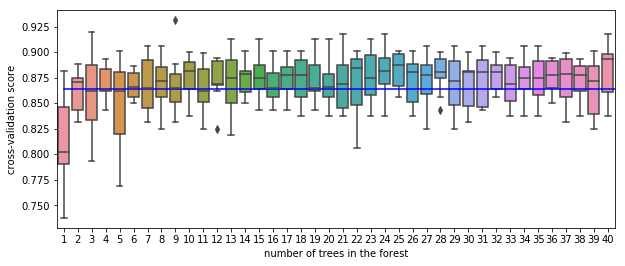

In [10]:
plt.figure(figsize=(10,4))
sns.boxplot(x=list(range(1,41)),y=cvs)
plt.xlabel('number of trees in the forest')
plt.ylabel('cross-validation score')
plt.plot([0,40],[p,p],color='b')

**Evaluation Metrics**

When there are unbalanced classes in a dataset, guessing the more common class will often yield very high accuracy. For this reason, we usually want to use different metrics that are less sensitive to imbalance when evaluating the predictive performance of classifiers. These metrics were originally developed for clinical trials, so to keep with the standard terminology, we define "good" wines (value of 1) as "positive" and the "bad" wines (value of 0) as the "negatives". We then define the following:

P - number of true positives in the sample.

N - number of true negatives in the sample.

TP - number of true positives: how many of the "positive" guesses of the classifier are true.

FP - number of false positives: how many of the "positive" guesses of the classifier are actually negatives.

TN - number of true negatives; similarly, this is how many of the "negative" guesses of the classifier are true.

FN - number of false negatives; how many of the "negative" guesses are actually positives.

When calling the score functions in scikit-learn you obtained the default measure of efficiency, which is called **accuracy**. This is simply the ratio of successful guesses (both positives and negatives) across all samples:

accuracy=(TP+TN)/(P+N).

In our case, when the two classes (good and bad wines) are very unbalanced in the sample, we should look for a better measure of efficiency.

Usually, the goal is to identify the members of the positive class (the rare class) successfully -- this could be either the good wines or the patients presenting a rare disease. It is common practice to define the following ratios:

The **recall** rate (also called the sensitivity or the true positive rate) is the ratio of true positive guesses among all positives:

recall=TP/P=TP/(TP+FN).

The **precision** is the ratio of the true positive guesses over all the positive guesses:

precision=TP/(TP+FP).

(e) Describe in words what the **difference** is between **precision** and **recall**. Describe an **application scenario** where precision would be more important than recall, and one scenario where recall would be more important than precision.

* precision: the proportion of *the number of true positive* among *the total number of cases classified as true*
* recall: the proportion of *the number of true positive* among *the total number of true positive in the sample*

**In risk analysis, the recall rate is more important**, since we can't let any risk escape.

**In junk-mail recognization, the precision rate is more important**, since we don't want a lot of normal emails to be killed by mistakes, which can cause serious problems in business.

Because precision and recall both provide valuable information about the quality of a classifier, we often want to combine them into a single general-purpose score. The **F1** score is defined as the harmonic mean of recall and precision:

F1=2×recall×precision/(recall+precision).

The harmonic mean of two numbers is closer to the smaller of the two numbers than the standard arithmetic mean. The F1 score thus tends to favor classifiers that are strong in both precision and recall, rather than classifiers that emphasize one at the cost of the other.

(f) For this part, **repeat the cross-validation analysis in part (b) changing the scoring parameter** of the cross_val_score function such that the measure used is the **F1 score**. **Comment** briefly on these numbers. Hint: See the [scikit-learn documentation](http://scikit-learn.org/stable/modules/model_evaluation.html) for the options you can use for the scoring parameter.

In [11]:
cvs=[]
for i in range(1,41):
    rfc=RandomForestClassifier(n_estimators=i)
    cvs.append(cross_val_score(rfc,X,y,scoring='f1',cv=10))

Text(0, 0.5, 'cross-validation score')

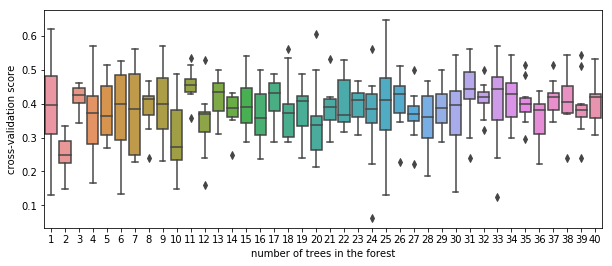

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(x=list(range(1,41)),y=cvs)
plt.xlabel('number of trees in the forest')
plt.ylabel('cross-validation score')

The average cross-validation score is between 0.2 and 0.5.

### Problem 3: Classifier Calibration

Many classifiers, including random forest classifiers, can return **prediction probabilities**, which can be interpreted as the probability that a given prediction point falls into a given class (i.e., given the data X and a candidate class c, the prediction probability states P(Y=c|X)). However, when the classes in the training data are **unbalanced**, as in this wine example, these prediction probabilities calculated by a classifier can be inaccurate. This is because many classifiers, again including random forests, do not have a way to internally adjust for this imbalance.

Despite the inaccuracy caused by imbalance, the prediction probabilities returned by a classifier can still be used to construct good predictions if we can choose the right way to turn a prediction probability into a prediction about the class that the datapoint belongs to. We call this task **calibration**.

If a classifier's prediction probabilities are accurate, the appropriate way to convert its probabilities into predictions is to simply choose the class with probability > 0.5. This is the default behavior of classifiers when we call their *predict* method. When the probabilities are inaccurate, this does not work well, but we can still get good predictions by choosing a more appropriate cutoff. In this question, we will choose a cutoff by cross validation.

(a) Fit a random forest classifier to the wine data using **15 trees**. Compute the **predicted probabilities** that the classifier assigned to each of the training examples (Hint: Use the *predict_proba* method of the classifier after fitting.). As a **sanity** test, construct a prediction based on these predicted probabilities that labels all wines with a predicted probability of being in class 1 > 0.5 with a 1 and 0 otherwise. For example, if originally probabilities =[0.1,0.4,0.5,0.6,0.7], the predictions should be [0,0,0,1,1]. **Compare** this to the output of the classifier's *predict* method, and show that they are the same.

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
rfc15=RandomForestClassifier(n_estimators=15)
rfc15.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
predict_manual=[1 if i>0.5 else 0 for i in rfc15.predict_proba(X)[:,1]]
predict=rfc15.predict(X)

In [39]:
print(confusion_matrix(predict,predict_manual))

[[1389    0]
 [   0  210]]


(b) **Write a function** *cutoff_predict* that takes a **trained** classifier, a data matrix X, and a cutoff, and generates predictions based on the classifier's predicted **probability and the cutoff value**, as you did in the previous question.

In [56]:
def cutoff_predict(classfier, X, cutoff):
    pred=[1 if i>cutoff else 0 for i in classfier.predict_proba(X)[:,1]]
    return pred

(c) Using **10-fold cross validation** find a cutoff in *np.arange(0.1,0.9,0.1)* that gives the best average **F1 score** when converting prediction probabilities from a **15-tree** random forest classifier into predictions.

To help you with this task, we have provided you a function *custom_f1* that takes a cutoff value and returns a function suitable for using as the *scoring* argument to *cross_val_score*. This function uses the *cutoff_predict* function that you defined in the previous question.

Using a **boxplot**, compare the **F1 scores** that correspond to each candidate **cutoff** value.

In [57]:
import sklearn
scores = []

def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)  # cutoff_predict is the function you generate in (b)
        return sklearn.metrics.f1_score(y, ypred)
    return f1_cutoff

In [42]:
rfc15=RandomForestClassifier(n_estimators=15)
rfc15.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
co=np.arange(0.1,0.9,0.1)
scores=[cross_val_score(rfc,X,y,scoring=custom_f1(c),cv=10) for c in co]

C:\datascience\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\datascience\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\datascience\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\datascience\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\datascience\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetri

Text(0, 0.5, 'cross-validation score')

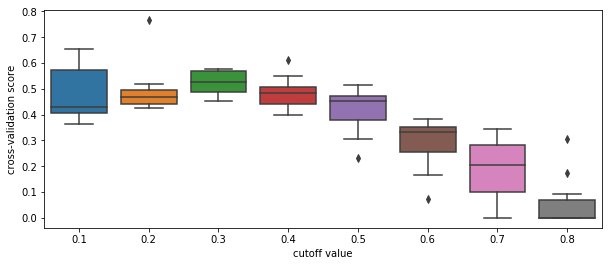

In [78]:
plt.figure(figsize=(10,4))
sns.boxplot(x=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], y=scores)
plt.xlabel('cutoff value')
plt.ylabel('cross-validation score')

(d) According to this analysis, which cutoff value gives the **best predictive results**? Explain why this answer makes sense in light of the **unbalanced** classes in the training data.

* cutoff value 0.3 gives the best predictive results. When the classes in training data is unbalanced (most of the data are in class 0), it's hard for the model to predict a sample to the class 1. So, we need to slightly lower the threshold, so that the accuracy of the model can increase.

## Good Jobs!